# Presentation of Results

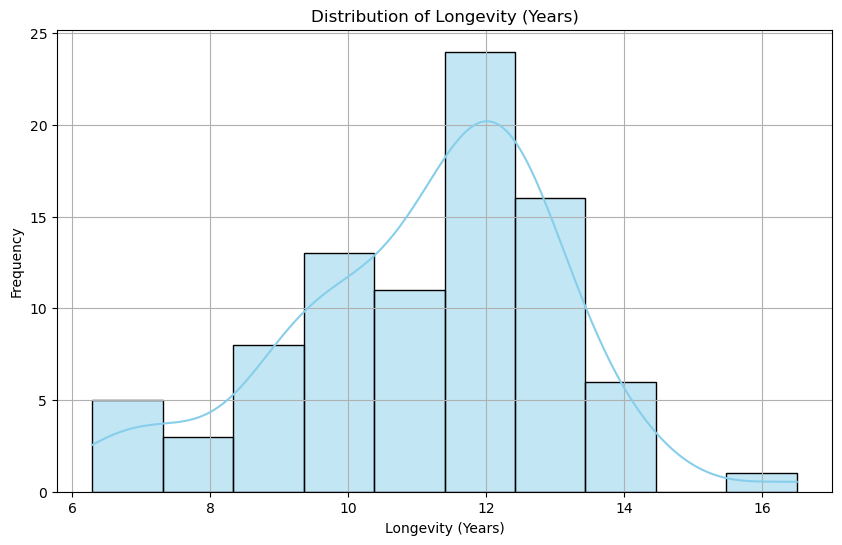

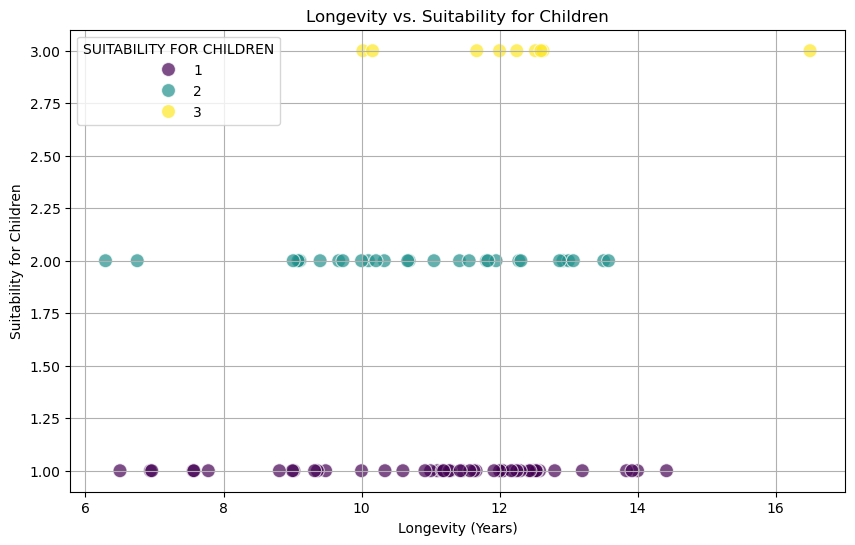

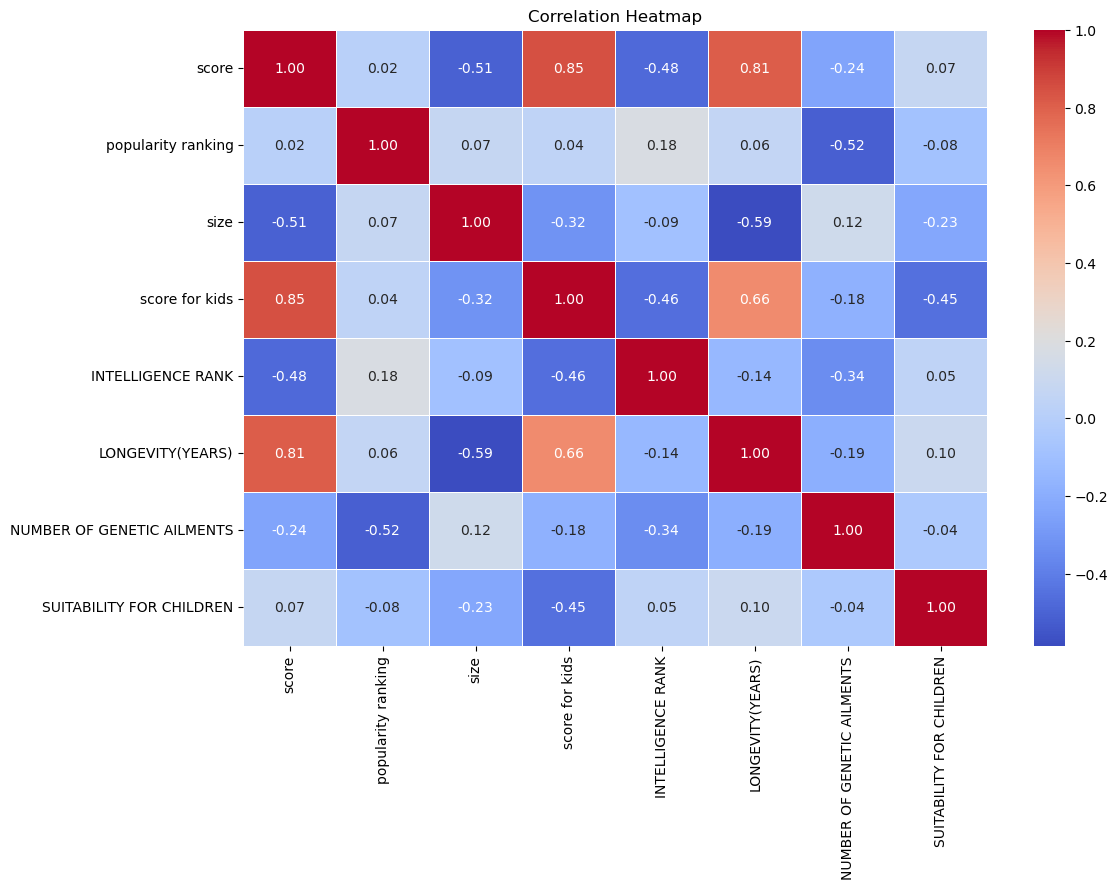

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data
cleaned_data = pd.read_csv("../data/cleaned_dogs_data.csv")

# Highlight 1: Distribution of Longevity
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_data['LONGEVITY(YEARS)'], kde=True, bins=10, color='skyblue')
plt.title('Distribution of Longevity (Years)')
plt.xlabel('Longevity (Years)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Highlight 2: Longevity vs. Suitability for Children
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LONGEVITY(YEARS)', y='SUITABILITY FOR CHILDREN', data=cleaned_data, hue='SUITABILITY FOR CHILDREN', palette='viridis', s=100, alpha=0.7)
plt.title('Longevity vs. Suitability for Children')
plt.xlabel('Longevity (Years)')
plt.ylabel('Suitability for Children')
plt.grid(True)
plt.show()

# Highlight 3: Correlation Heatmap
plt.figure(figsize=(12, 8))

# Select only numeric columns for correlation
numeric_cols = cleaned_data.select_dtypes(include=['float64', 'int64'])

corr_matrix = numeric_cols.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()




# Results Part 2

/tmp/ipykernel_10549/4239883482.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SUITABILITY FOR CHILDREN', y='Breed', data=top_breeds, palette='viridis')


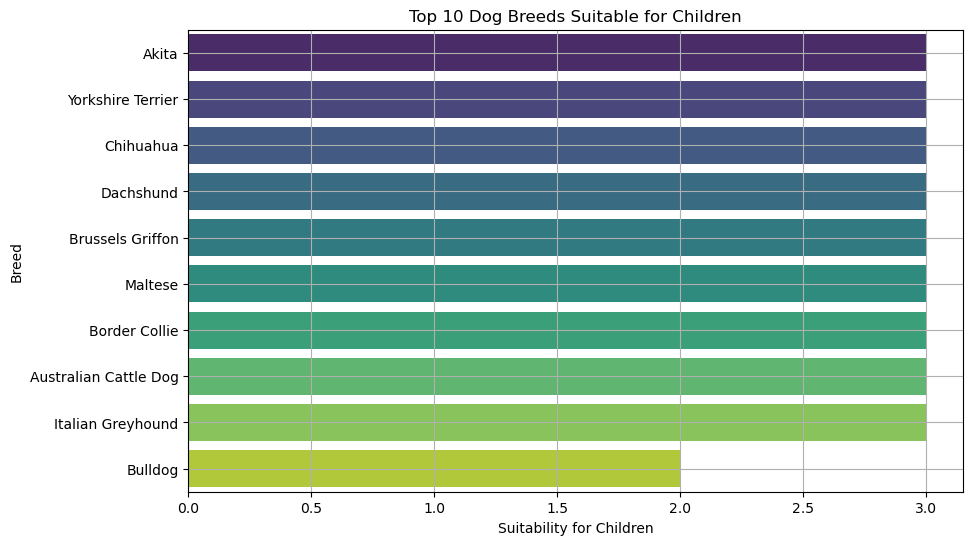


Top 10 Dog Breeds and Their Suitability Scores:
                    Breed  SUITABILITY FOR CHILDREN
85                  Akita                         3
68      Yorkshire Terrier                         3
54              Chihuahua                         3
53              Dachshund                         3
64       Brussels Griffon                         3
65                Maltese                         3
28          Border Collie                         3
50  Australian Cattle Dog                         3
76      Italian Greyhound                         3
86                Bulldog                         2


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data
cleaned_data = pd.read_csv("../data/cleaned_dogs_data.csv")

# Sort by suitability for children in descending order
top_breeds = cleaned_data.sort_values(by='SUITABILITY FOR CHILDREN', ascending=False).head(10)

# Display top 10 breeds and their suitability scores in a table
plt.figure(figsize=(10, 6))
sns.barplot(x='SUITABILITY FOR CHILDREN', y='Breed', data=top_breeds, palette='viridis')
plt.title('Top 10 Dog Breeds Suitable for Children')
plt.xlabel('Suitability for Children')
plt.ylabel('Breed')
plt.grid(True)
plt.show()

# Display detailed information for each breed
classification_points = top_breeds[['Breed', 'SUITABILITY FOR CHILDREN']]
print("\nTop 10 Dog Breeds and Their Suitability Scores:")
print(classification_points)


# Question 3

In [17]:
import pandas as pd

# Load your cleaned dataset with necessary columns
cleaned_data = pd.read_csv("../data/cleaned_dogs_data.csv")

# Check unique values in 'intelligence' column
print(cleaned_data['intelligence'].unique())

# Mapping based on observed unique values
intelligence_mapping = {
    'Above average': 4,
    'Average': 3,
    'Excellent': 5,
    'Fair': 2,
    'Brightest': 6,
    'Lowest': 1
}

# Apply mapping to 'intelligence' column
cleaned_data['intelligence'] = cleaned_data['intelligence'].map(intelligence_mapping)

# Filter out rows where 'intelligence' or 'popularity ranking' are not numeric
cleaned_data = cleaned_data[pd.to_numeric(cleaned_data['intelligence'], errors='coerce').notna()]
cleaned_data = cleaned_data[pd.to_numeric(cleaned_data['popularity ranking'], errors='coerce').notna()]

# Subset relevant columns for correlation analysis
relevant_columns = ['popularity ranking', 'intelligence']
subset_data = cleaned_data[relevant_columns]

# Calculate the correlation between popularity ranking and intelligence
correlation = subset_data['popularity ranking'].corr(subset_data['intelligence'])

# Print the correlation coefficient
print(f"Correlation between Popularity Ranking and Intelligence: {correlation}")


['Above average' 'Average' 'Excellent' 'Fair' 'Brightest' 'Lowest']
Correlation between Popularity Ranking and Intelligence: -0.17837869369779788


# Conclusion:
While there is a statistically significant negative correlation between Popularity Ranking and Intelligence, the magnitude (-0.178) suggests that this relationship is weak. This means that, on average, as a dog breed's popularity increases, its perceived intelligence might slightly decrease, but individual variations among breeds are important to consider.

This interpretation helps in understanding the relationship between these two variables based on the data you have analyzed.